In [13]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

PWD = os.path.abspath("../../..")
OUTPUT_PATH = os.path.join(PWD, "combined_csv_output")

print(OUTPUT_PATH)

/Users/mina/Desktop/combined_csv_output


In [14]:
file_name = "result.csv"
list_of_app_folder = os.listdir(OUTPUT_PATH)
list_of_app_folder.remove('.DS_Store')
print(list_of_app_folder)
print(len(list_of_app_folder))

['6com.danxinben.xs', '7wzx.Medal25', '14com.hasidea_android.money', '10com.hammocksoftware.callyouback', '8com.notebook', '5com.rainbow.GirlDiz2', '0fileman', '0com.happymaau.MathRef', '15com.lxw.dirveoutskeeter', '1org.fankong.m', '13com.myboyfriendisageek.fotofoglite', '3ClockSync']
12


In [15]:
entire_df = pd.DataFrame()

for folder_name in list_of_app_folder:
    file = os.path.join(os.path.join(OUTPUT_PATH, folder_name), file_name)
#     print(file)
    df = pd.read_csv(file, delimiter = ',')
    entire_df = entire_df.append(df)

In [16]:
_apks = df['apk'].unique()
_columns = list(df.columns)
_del_columns = ['apk', 'type']

_metrics = _columns
for _col in _del_columns:
    _metrics.remove(_col)
    
print(_columns, _metrics)

['branch-load-misses', 'branch-loads', 'dTLB-loads', 'dTLB-stores', 'iTLB-loads', 'iTLB-stores', 'L1-dcache-load-misses', 'L1-dcache-store-misses', 'L1-dcache-stores', 'L1-icache-load-misses', 'L1-icache-store-misses', 'node-loads', 'node-stores', 'branch-instructions', 'branch-misses', 'instructions'] ['branch-load-misses', 'branch-loads', 'dTLB-loads', 'dTLB-stores', 'iTLB-loads', 'iTLB-stores', 'L1-dcache-load-misses', 'L1-dcache-store-misses', 'L1-dcache-stores', 'L1-icache-load-misses', 'L1-icache-store-misses', 'node-loads', 'node-stores', 'branch-instructions', 'branch-misses', 'instructions']


In [17]:
import matplotlib.pyplot as plt

def plot_agg(df, _metrics):
    ax = df[_metrics].sum().plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
    ax.set_xlabel("Hour", fontsize=12)
    ax.set_ylabel("V", fontsize=12)
    plt.show()
# df_b = df[df["type"]=='benign']
# df_b = df[df["type"]=='malicious']
# df.mean().plot(kind="bar")


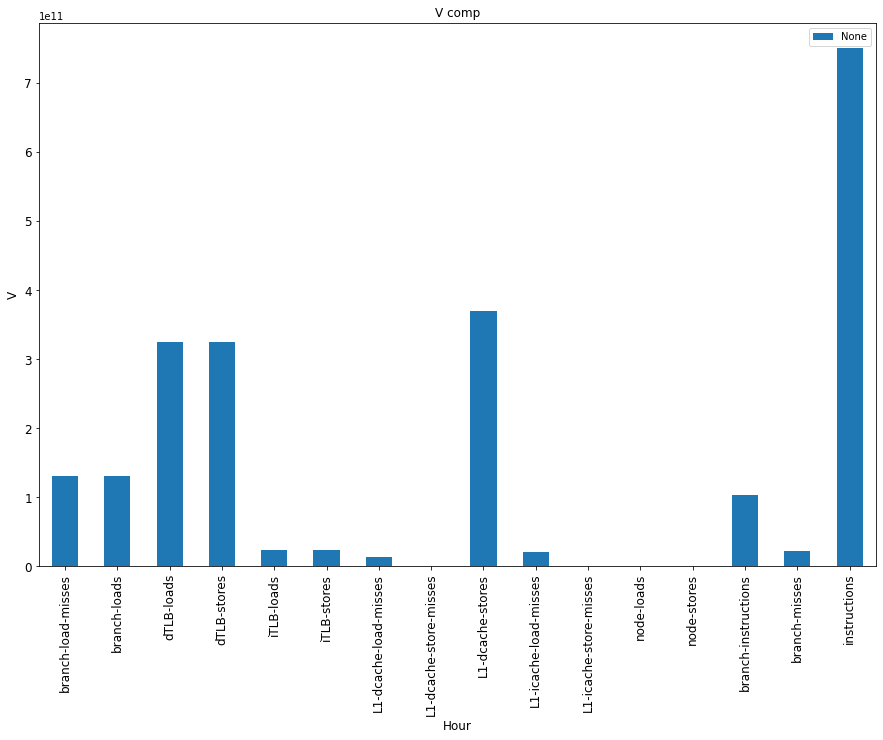

In [18]:
benign = _apks[0]
_b_df = entire_df.loc[entire_df['apk'] == _apks[0]]
plot_agg(_b_df, _metrics)

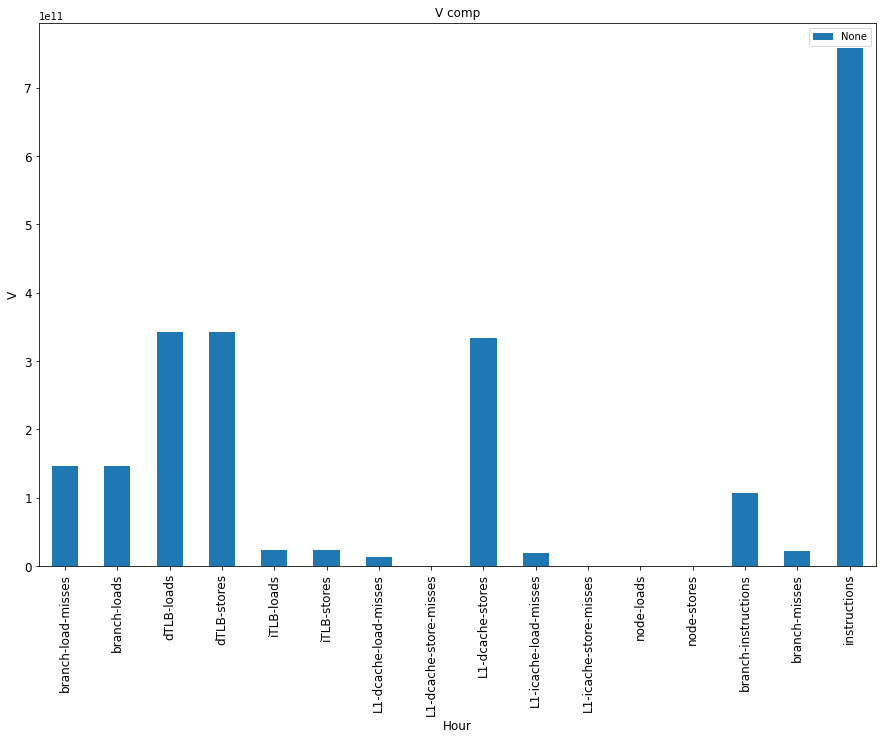

In [19]:
malicious = "5FA145D23031D57DAD32EDB735A1C2C8D6FD1F5A18BA3A06CC120BAC92EF18B0.apk"
_m_df = entire_df.loc[entire_df['apk'] == malicious]
plot_agg(_m_df, _metrics)

In [20]:
def plot_agg_across_types(df, _metrics):
    print(df[_metrics].sum(0).unstack(-1))
#     ax = df[_metrics].sum(1).unstack().plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
#     ax.set_xlabel("Hour", fontsize=12)
#     ax.set_ylabel("V", fontsize=12)
#     plt.show()

In [21]:
plot_agg_across_types(entire_df, _metrics)

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [22]:
entire_df

,branch-load-misses,branch-loads,dTLB-loads,dTLB-stores,iTLB-loads,iTLB-stores,L1-dcache-load-misses,L1-dcache-store-misses,L1-dcache-stores,L1-icache-load-misses,L1-icache-store-misses,node-loads,node-stores,branch-instructions,branch-misses,instructions,type,apk
0,0,0,0,0,632,4612,12066,0,2924846,152920,0,0,0,3552860,623185,33830573,benign,4386205544C7C60082E738DC43B59E5797CEB876AF6F18...
1,0,0,0,0,819917,821289,536371,0,12290790,671104,0,0,0,10154883,1839299,84836530,benign,4386205544C7C60082E738DC43B59E5797CEB876AF6F18...
2,0,0,0,0,1577091,1583605,979465,0,15048937,796596,0,0,0,15250223,2839237,123379033,benign,4386205544C7C60082E738DC43B59E5797CEB876AF6F18...
3,0,0,0,0,2361985,2364106,1433714,0,27944666,1450466,0,0,0,17963144,3564762,144022449,benign,4386205544C7C60082E738DC43B59E5797CEB876AF6F18...
4,0,0,0,0,3161108,3161108,1836392,0,32666679,1748380,0,0,0,21357874,4181195,169645626,benign,4386205544C7C60082E738DC43B59E5797CEB876AF6F18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,151297006,151297006,343586241,343586241,11846445,11846445,7015747,0,287541705,16708166,0,0,0,175349894,40836028,1218197695,malicious,5FA145D23031D57DAD32EDB735A1C2C8D6FD1F5A18BA3A...
3980,151297006,151297006,343586241,343586241,12075388,12079872,7160256,0,287541705,16708166,0,0,0,177619733,41340217,1234287724,malicious,5FA145D23031D57DAD32EDB735A1C2C8D6FD1F5A18BA3A...
3981,151297006,151297006,343586241,343586241,12388644,12389513,7317749,0,287541705,16708166,0,0,0,178589727,41600161,1240909817,malicious,5FA145D23031D57DAD32EDB735A1C2C8D6FD1F5A18BA3A...
3982,151297006,151297006,343586241,343586241,12940030,12940030,7610804,0,287541705,16708166,0,0,0,179327613,41771504,1246033789,malicious,5FA145D23031D57DAD32EDB735A1C2C8D6FD1F5A18BA3A...


In [23]:
print(entire_df.columns)

Index(['branch-load-misses', 'branch-loads', 'dTLB-loads', 'dTLB-stores',
       'iTLB-loads', 'iTLB-stores', 'L1-dcache-load-misses',
       'L1-dcache-store-misses', 'L1-dcache-stores', 'L1-icache-load-misses',
       'L1-icache-store-misses', 'node-loads', 'node-stores',
       'branch-instructions', 'branch-misses', 'instructions', 'type', 'apk'],
      dtype='object')


In [25]:
print(df['branch-load-misses'].tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21120, 632428, 4329094, 4329094, 4329094, 4329094, 5700855, 7723244, 10212007, 11339773, 11945026, 12235461, 13134367, 19166360, 21642832, 26280713, 28474099, 28869570, 30362738, 31508699, 31900678, 32264460, 32541834, 34342931, 35183252, 35185789, 35516369, 35528367, 35531474, 35666087, 35692882, 35706938, 35706938, 35706938, 36085220, 38967198, 40714111, 42088750, 43175759, 43177314, 43534737, 45063799, 46503913, 47701790, 48940249, 50038845, 51477477, 53466501, 55502763, 59476131, 61852756, 64614542, 67298727, 69412313, 74510068, 77845022, 84404727, 86783626, 90896788, 93405816, 94854679, 97458356, 98462197, 103615967, 117472849, 119923662, 121705459, 124245772, 125772465, 126712095, 127525243, 127643597, 127818814, 127977192, 129217377, 130408349, 132060663, 132349780, 132353018, 132355297, 132355297, 132355297, 132627084, 132629640, 132629640, 286423, 560121, 820530, 1364531, 1591863, 1819953, 2188847, 2459939, 2918045, 3158919, 3413351, 